# CNN

要使用PyTorch进行卷积神经网络（CNN）的训练，您需要按照以下步骤操作：

1. **定义数据集类**：如果您有自定义的数据集，您需要使用`torch.utils.data.Dataset`来封装您的数据和标签。
2. **构建CNN模型**：定义一个继承自`torch.nn.Module`的类来构建您的CNN。
3. **定义损失函数和优化器**：选择适合您任务的损失函数和优化器。
4. **训练模型**：编写训练循环，使用您的数据训练模型。
5. **评估模型**：在验证集或测试集上评估模型的性能。

## 模型训练步骤

下面是一个简化的例子，展示如何使用PyTorch进行这一过程：

### 步骤 1: 定义数据集类

```python
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        x = self.data[index]
        y = self.labels[index]
        return x, y
```

### 步骤 2: 构建CNN模型

```python
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
```

### 步骤 3: 定义损失函数和优化器

```python
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
```

### 步骤 4: 训练模型

```python
def train_model(model, dataloader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        for data, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Assuming your data and labels are numpy arrays
from sklearn.model_selection import train_test_split

data, labels = ... # your data and labels

# Convert data and labels to PyTorch tensors
data = torch.tensor(data, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.long)

# Create dataset and dataloader
dataset = CustomDataset(data, labels)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Train your model
train_model(model, dataloader, criterion, optimizer)
```

### 步骤 5: 评估模型

这一步通常涉及在一个独立的测试集上运行模型，并使用例如准确率这样的指标来评估性能。

请注意，这个例子假设您的数据是图像数据，且已经适当地归一化和预处理。您可能需要根据您的具体数据和任务调整CNN结构、损失函数和其他参数。


## 模型评估步骤

模型训练完成后，使用测试数据进行模型评估是检查模型泛化能力的重要步骤。下面是一个详细的步骤说明，展示如何在PyTorch中使用测试数据对一个训练好的模型进行评估。

### 步骤 1: 准备测试数据
确保你的测试数据集已经按照和训练数据相同的方式进行预处理。这包括数据的归一化、重塑等步骤。然后，使用`DataLoader`来加载测试数据，这样可以方便地在评估过程中批量处理数据。

```python
from torch.utils.data import DataLoader, TensorDataset
import torch

# 假设 test_data 和 test_labels 已经被正确处理并转换为Tensor
test_dataset = TensorDataset(test_data, test_labels)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
```

### 步骤 2: 设置模型为评估模式
在评估之前，确保将模型设置为评估模式。这样可以关闭如Dropout和Batch Normalization等只在训练时有用的层。

```python
model.eval()
```

### 步骤 3: 评估模型
关闭梯度计算，使用测试数据集来评估模型的性能。通常，我们会计算并记录诸如准确率、损失等指标。

```python
import torch.nn.functional as F

correct = 0
total = 0
total_loss = 0.0

with torch.no_grad():  # 关闭梯度计算
    for data, labels in test_loader:
        outputs = model(data)
        loss = F.cross_entropy(outputs, labels)  # 计算损失
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

average_loss = total_loss / len(test_loader)
accuracy = correct / total
print(f'Accuracy of the model on the test data: {100 * accuracy}%')
print(f'Average loss: {average_loss}')
```

### 步骤 4: 分析结果
根据模型在测试集上的表现来分析模型的性能。高准确率和低损失指示模型有较好的泛化能力。如果模型在训练集上表现良好，但在测试集上表现不佳，则可能存在过拟合。

### 步骤 5: 进一步的测试
根据需要进行更多的测试，例如混淆矩阵、精确度、召回率和F1分数等，这些都可以帮助你更全面地了解模型的性能。

通过这些步骤，你可以有效地评估你的模型，并根据测试结果进行必要的调整和优化。这是确保模型在实际应用中能够可靠工作的关键步骤。


# 完整工程展示

Using cuda device


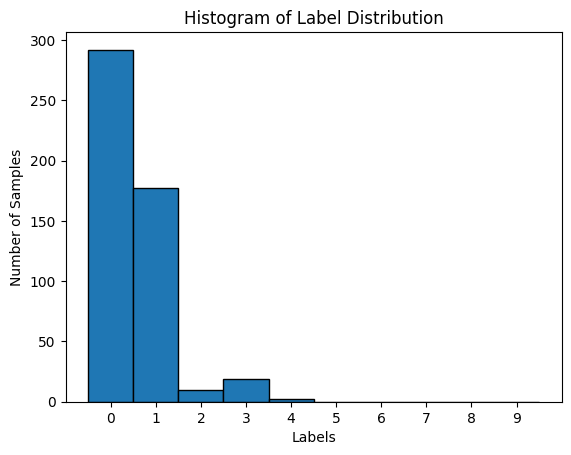

Layer: conv1.weight | Size: torch.Size([2, 1, 3, 3]) 

Layer: conv1.bias | Size: torch.Size([2]) 

Layer: conv2.weight | Size: torch.Size([4, 2, 3, 3]) 

Layer: conv2.bias | Size: torch.Size([4]) 

Layer: fc1.weight | Size: torch.Size([16, 64]) 

Layer: fc1.bias | Size: torch.Size([16]) 

Layer: fc2.weight | Size: torch.Size([5, 16]) 

Layer: fc2.bias | Size: torch.Size([5]) 

Total number: 4884 Bytes


In [6]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt 


# 检查CUDA是否可用，如果可用则使用CUDA，否则使用CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

''' 
自定义数据集，需要定义好‘__getitem__’函数
'''
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        x = self.data[index]
        y = self.labels[index]
        return x, y
    
# 定义一个简单的CNN模型
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 2, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(2, 4, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(4 * (4 * 4), 16) # 2*4*4 = channels*H*W
        self.fc2 = nn.Linear(16, 5)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 4 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        

# 读取数据集
data_train = np.loadtxt('../ECG5000/data/ECG5000_TRAIN.txt')

# 获取data和label
X_train, y_train = data_train[:, 1:], data_train[:, 0]-1.0

# # 归一化处理
# min_val = np.min(X_train, axis=0)
# max_val = np.max(X_train, axis=0)
# X_train_normalized = (X_train - min_val) / (max_val - min_val)
# # 处理分母为0的情况
# X_train_normalized = np.nan_to_num(X_train_normalized)

new_X_train = np.zeros([X_train.shape[0], 16, 16])
new_X_train[:,0:10, 0:14] = X_train.reshape([X_train.shape[0],10,14])

data, labels = new_X_train, y_train

# Convert data and labels to PyTorch tensors
data = torch.tensor(data, dtype=torch.float32).unsqueeze(1)
labels = torch.tensor(labels, dtype=torch.long)

# Create dataset and dataloader
dataset = CustomDataset(data, labels)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Plotting the histogram of the labels
plt.hist(labels.numpy(), bins=np.arange(11)-0.5, edgecolor='black')
plt.xlabel('Labels')
plt.ylabel('Number of Samples')
plt.title('Histogram of Label Distribution')
plt.xticks(np.arange(10))
plt.show()

# 定义模型，损失函数以及优化器
model = SimpleCNN()
model.to(device)

# 统计模型参数量
total_params = 0
for name, param in model.named_parameters():
    # print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")
    print(f"Layer: {name} | Size: {param.size()} \n") # 打印每一层距离名称、参数大小和参数数值
    num_params = param.numel()
    total_params += num_params
    
print(f"Total number: {total_params*4} Bytes")


In [ ]:
plt.figure()
for idx in range (500):
    plt.plot(X_train[idx,0:140])
plt.show()

plt.figure()
for idx in range (500):
    plt.plot(X_train[idx,0:140])
plt.show()

## 模型训练

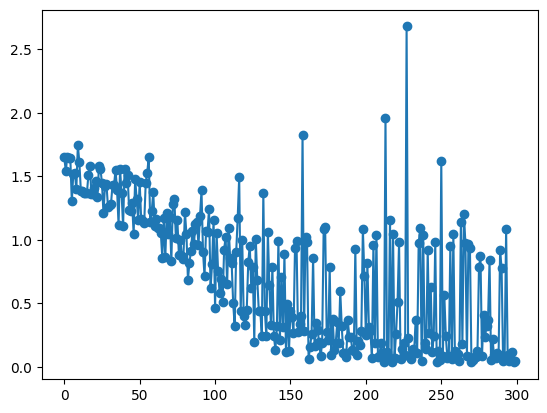

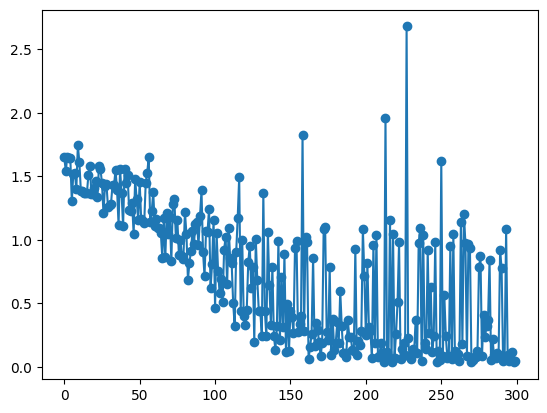

Epoch 300, Loss: 0.04397239536046982


In [7]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

# 模型训练步骤
def train_model(model, dataloader, criterion, optimizer, num_epochs=20):
    model.train()
    model.to(device)  # Move the model to the device (GPU or CPU)
    
        
    # 初始化用于绘图的损失列表
    loss_values = []
    
    # 设置实时更新图的基础配置
    plt.figure(figsize=(10, 5))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss During Training')
    
    for epoch in range(num_epochs):
        for data, labels in dataloader:
            if device.type == 'cuda':
                data, labels = data.to(device), labels.to(device)  # Move data and labels to the device
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        
        # 记录当前epoch的损失
        loss_values.append(loss.item())
        
        # 动态更新图表
        clear_output(wait=True)
        plt.plot(loss_values, label='Training Loss', marker='o')
        # plt.legend()
        display(plt.gcf())
        plt.pause(0.01)  # 暂停一点时间以便更新图表
        
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')
        
# 损失函数
criterion = nn.CrossEntropyLoss()

# 优化器
optimizer = torch.optim.SGD(model.parameters(), lr=0.0002)

# Train your model
train_model(model, dataloader, criterion, optimizer, num_epochs=300)

## 测试集验证

In [9]:
# 读取测试数据集
# data_train = np.loadtxt('./ECG5000/data/ECG5000_TRAIN.txt')
data_test = np.loadtxt('../ECG5000/data/ECG5000_TEST.txt')

# 获取data和label
X_test, y_test = data_test[:, 1:], data_test[:, 0]-1.0

# 评估模型
new_X_test = np.zeros([X_test.shape[0], 16, 16])
new_X_test[:,0:10, 0:14] = X_test.reshape([X_test.shape[0],10,14])

test_data, test_labels = new_X_test, y_test
test_data = torch.tensor(test_data, dtype=torch.float32).unsqueeze(1)
test_labels = torch.tensor(test_labels, dtype=torch.long)

test_dataset = CustomDataset(test_data, test_labels)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

model.eval()

correct = 0
total = 0
total_loss = 0.0

y_pred = []
y_true = []

with torch.no_grad():  # 关闭梯度计算
    for data, labels in test_loader:
        if device.type == 'cuda':
            data, labels = data.to(device), labels.to(device)  # Move data and labels to the device
        outputs = model(data)
        loss = F.cross_entropy(outputs, labels)  # 计算损失
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        y_pred.extend(predicted.cpu().numpy())  # 收集预测结果
        y_true.extend(labels.cpu().numpy())     # 收集真实标签

average_loss = total_loss / len(test_loader)
accuracy = correct / total
print(f'Accuracy of the model on the test data: {100 * accuracy}%')
print(f'Average loss: {average_loss}')

Accuracy of the model on the test data: 89.82222222222222%
Average loss: 0.4087406337051324


C:\Users\Charles\AppData\Local\Temp\ipykernel_19156\863788986.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(np.unique(y_pred)))
C:\Users\Charles\AppData\Local\Temp\ipykernel_19156\863788986.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(np.unique(y_pred)))


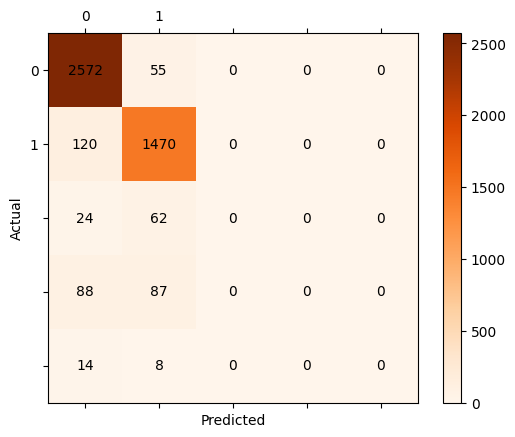

In [10]:
from sklearn.metrics import confusion_matrix

# 使用matplotlib绘制混淆矩阵
# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap=plt.cm.Oranges)  # 选择颜色映射

# 为图添加颜色条
plt.colorbar(cax)

# 设置坐标轴
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels([''] + list(np.unique(y_pred)))
ax.set_yticklabels([''] + list(np.unique(y_pred)))

# 在混淆矩阵的各个单元格中添加数值标签
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

# 显示图表
plt.show()

## 基于numpy的CNN前向推理

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np


# 实现 NumPy 功能
def conv2d(input, weight, bias, stride, padding):
    batch_size, in_channels, in_height, in_width = input.shape
    out_channels, _, kernel_height, kernel_width = weight.shape
    out_height = (in_height + 2 * padding - kernel_height) // stride + 1
    out_width = (in_width + 2 * padding - kernel_width) // stride + 1
    
    # Padding
    input_padded = np.pad(input, ((0, 0), (0, 0), (padding, padding), (padding, padding)), mode='constant')
    
    # Output tensor
    output = np.zeros((batch_size, out_channels, out_height, out_width))
    
    # Convolution
    for y in range(out_height):
        for x in range(out_width):
            for o in range(out_channels):
                output[:, o, y, x] = np.sum(
                    input_padded[:, :, y*stride:y*stride+kernel_height, x*stride:x*stride+kernel_width] * weight[o, :, :, :], axis=(1, 2, 3)) + bias[o]
    return output

def max_pool2d(input, kernel_size, stride):
    batch_size, channels, in_height, in_width = input.shape
    out_height = (in_height - kernel_size) // stride + 1
    out_width = (in_width - kernel_size) // stride + 1
    output = np.zeros((batch_size, channels, out_height, out_width))
    
    for y in range(out_height):
        for x in range(out_width):
            output[:, :, y, x] = np.max(input[:, :, y*stride:y*stride+kernel_size, x*stride:x*stride+kernel_size], axis=(2, 3))
    return output

def relu(input):
    return np.maximum(0, input)

def linear(input, weight, bias):
    return input.dot(weight.T) + bias

def cnn_forward(input_data, params):
    # 前向推理
    x = conv2d(input_data, params['conv1.weight'], params['conv1.bias'], stride=1, padding=1)    
    x = relu(x)
    x = max_pool2d(x, kernel_size=2, stride=2)
    x = conv2d(x, params['conv2.weight'], params['conv2.bias'], stride=1, padding=1)
    x = relu(x)
    x = max_pool2d(x, kernel_size=2, stride=2)
    x = x.reshape(x.shape[0], -1)  # Flatten
    x = linear(x, params['fc1.weight'], params['fc1.bias'])
    x = relu(x)
    output = linear(x, params['fc2.weight'], params['fc2.bias'])
    # print(output)
    return output


# 假设输入数据
input_data = np.random.rand(1, 1, 16, 16).astype(np.float32)  # (batch_size, channels, height, width)

# 实例化模型并提取参数
params = {name: param.detach().cpu().numpy() for name, param in model.named_parameters()}

# 随机抽取一个测试样本
rd_idx = np.random.randint(test_labels.shape[0])
rd_idx = 100
input_data = test_data[rd_idx,:].reshape([1,1,test_data.shape[2],test_data.shape[3]])
print(input_data.shape)

# numpy前向推理
output = cnn_forward(input_data, params)

# 模型原生推理结果
input_data = input_data.to(device)
output2 = model(input_data)
output2 = output2.detach().cpu().numpy()

# 打印两种推理方式的结果，可以看到是一致的
print(output, '\n' , output2)

# 预测label
predict_ = np.argmax(output)
print(f"预测类型：{predict_}, 真值： {test_labels[rd_idx]}")

torch.Size([1, 1, 16, 16])
[[ 3.56409762 -0.80816844 -2.00924876 -0.79671708 -1.85815222]] 
 [[ 3.5640976  -0.8081684  -2.0092487  -0.79671717 -1.8581526 ]]
预测类型：0, 真值： 0


In [12]:
# 将模型参数转换为C++代码
def model_to_cpp(model):
    for name, param in model.named_parameters():
        cpp_array = "float " + name.replace('.', '_') + "[] = {"
        array_elements = param.detach().cpu().numpy().flatten()
        cpp_array += ', '.join(map(str, array_elements))
        cpp_array += "};"
        print(cpp_array)

model_to_cpp(model)

float conv1_weight[] = {-0.29365408, -0.2599203, -0.18950784, -0.17831895, -0.18865408, 0.13755313, 0.08071891, 0.17993373, 0.28898272, -0.56474215, -0.3488276, -0.21361212, 0.20723991, 0.026027372, -0.20361617, -0.2315682, -0.19915868, -0.44326764};
float conv1_bias[] = {-0.17029652, 0.11206994};
float conv2_weight[] = {-0.021573348, -0.039559517, 0.038141742, 0.22961853, -0.22529891, 0.017257165, 0.11487418, -0.020898823, -0.040798306, -0.084260836, -0.11589992, 0.2634675, -0.05847406, -0.15866445, -0.050071076, -0.020851923, -0.19344452, 0.18281564, -7.8864585e-05, 0.1581292, -0.16528535, 0.10879513, 0.13218836, 0.028877087, 0.1844788, 0.17151867, -0.020027753, -0.07084623, -0.074081294, -0.0630857, 0.17826942, 0.20165661, 0.2531998, 0.14507166, 0.285365, 0.2768675, -0.007927367, 0.14537461, 0.21643977, 0.1558108, -0.0263604, 0.046426073, -0.20703843, 0.035978165, 0.10932545, 0.31858513, 0.28861487, 0.24741009, 0.07369848, 0.033814095, 0.073282994, 0.027500933, -0.2409193, -0.077530